In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

# dit stuk is uit IFERC_ALL
def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
       
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
                      
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


Integral over Q is: 87.27935188452179
Integral over E is: 33.239786133409225
Integral over e is: 54.152667637209525


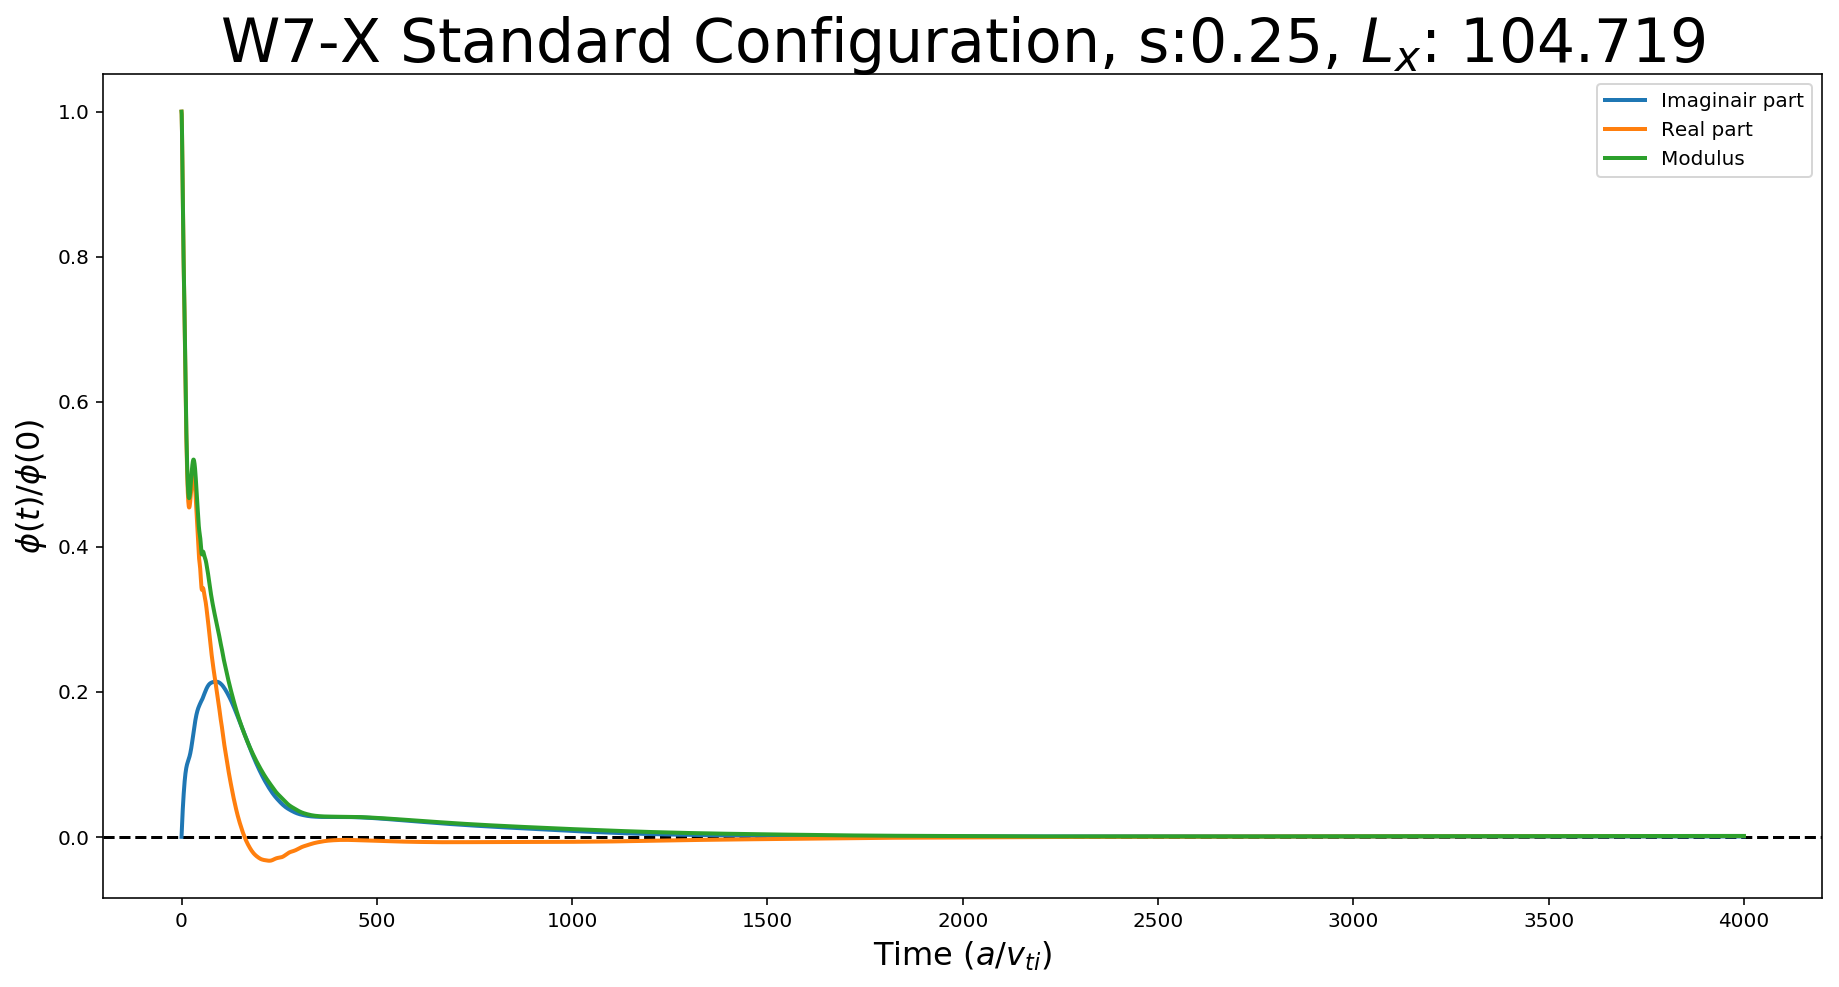

In [2]:
data = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/104.719/gamdiagions_act.dat')

E = (data[:,1]*(1/data[0, 1]))
e = (data[:,2]*(1/data[0, 1]))
t = data[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.25, $L_{x}$: 104.719', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')

Q = np.sqrt(E**2+e**2)
ax1.plot(t, e, linewidth=2, label=('Imaginair part'))
ax1.plot(t, E, linewidth=2, label=('Real part'))
ax1.plot(t, Q, linewidth=2, label=('Modulus'))
plt.legend()

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ1 = (np.trapz(Q,t))
integ2 = (np.trapz(E,t))
integ3 = (np.trapz(e,t))

print("Integral over Q is:", integ1)
print("Integral over E is:", integ2)
print("Integral over e is:", integ3)

In [12]:
#n=0
#teller=0
#while teller < 1200:
#    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
#        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
#    else: 
#        teller=0
#    n=n+1 
#print("The residual value is:", Q[n], t[n])

The residual value is: 0.0014153711853525665 1844.4


In [14]:
#n=0
#teller=0
#residual=0
#while teller < 4000:
#    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
#        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
#        residual=((residual*n)+Q[n])/(n+1) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
#    else: 
#        teller=0
#        residual=0
#    n=n+1 
#print("The residual value is:", Q[n],t[n], residual)

The residual value is: 0.0007975379086628782 2970.0 0.0007122474216304561


In [15]:
n=0
teller=0
residual=0
while teller < 3000:
    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual=((residual*n)+Q[n])/(n+1) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller=0
        residual=0
    n=n+1 
print("The residual value is:", residual)
print("rough range of Q values for determining average residual:", Q[n-3000], Q[n])
print("time range for determining average residual:",t[n-3000],t[n])

The residual value is: 0.0007319844166465058
rough range of Q values for determining average residual: 0.004575319825929132 0.0005220481758706727
time range for determining average residual: 1362.0 2568.0


In [16]:
n=0
teller=0
residual=0
nfix=0
while teller < 3000:
    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual=(residual*(n-nfix)+Q[n])/(n+1-nfix)#to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else:
        teller=0
        residual=0
        nfix = (n+1)
    n=n+1
print("The residual value is:", residual)
print("rough range of Q values for determining average residual:", Q[n-3000], Q[n])
print("time range for determining average residual:",t[n-3000],t[n])

The residual value is: 0.0015586388178459583
rough range of Q values for determining average residual: 0.004575319825929132 0.0005220481758706727
time range for determining average residual: 1362.0 2568.0


In [3]:
#to make sure it takes into account all values until the end of the data and to determine the standard deviation in the residual
n=0
teller=0
residual=0
nfix=0
finalvaluedata=9949 
while n < finalvaluedata:
    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual=(residual*(n-nfix)+Q[n])/(n+1-nfix)#to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else:
        teller=0
        residual=0
        nfix = (n+1)
    n=n+1
print("Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:")
print("The values of n, Q[n] and t at the start of the averaging are: n =", n-teller, ", Q =", Q[n-teller], ", t =", t[n-teller])
print("The amount of data points over which the average is taken =", teller)
listofqvalues=Q[(n-teller):n]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std=np.std(listofqvalues)
#meanres=np.mean(listofqvalues)
print("The residual value is:",residual, "+-", std)

Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:
The values of n, Q[n] and t at the start of the averaging are: n = 3388 , Q = 0.004575319825929132 , t = 1362.0
The amount of data points over which the average is taken = 6561
The residual value is: 0.0011865967102775076 +- 0.0008682133266640964
